<a href="https://colab.research.google.com/github/vedvatsal3/Vision-Transformer-ViT-with-Layerwise-Relevance-Propagation-LRP-/blob/main/AttentionMaps_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: Classify Images Using ViT


1. Load the pre-trained ViT model.

2. Preprocess the ImageNet-A dataset to match the model’s input requirements.

3. Run inference on the dataset to classify the images.

4. Identify correctly and incorrectly classified samples for further analysis.

In [1]:
!pip install transformers torch pillow matplotlib numpy

In [2]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch

# Load the pre-trained ViT model and feature extractor
model_name = "google/vit-base-patch16-224"
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [3]:
from PIL import Image

# Example: Load an image from the dataset
dataset_path = "/content/imagenet_a/imagenet-a"  # Replace with the path to your extracted dataset
print(f"Dataset path: {dataset_path}")


wordnet_id_to_label = {                  # for mapping, due to unallignment of data with labels
    "n01498041": "stingray",
    "n01531178": "goldfinch",
    "n01534433": "junco",
    "n01558993": "American robin",
    "n01580077": "jay",
    "n01614925": "bald eagle",
    "n01616318": "vulture",
    "n01631663": "newt",
    "n01641577": "American bullfrog",
    "n01669191": "box turtle",
    "n01677366": "green iguana",
    "n01687978": "agama",
    "n01694178": "chameleon",
    "n01698640": "American alligator",
    "n01735189": "garter snake",
    "n01770081": "harvestman",
    "n01770393": "scorpion",
    "n01774750": "tarantula",
    "n01784675": "centipede",
    "n01819313": "sulphur-crested cockatoo",
    "n01820546": "lorikeet",
    "n01833805": "hummingbird",
    "n01843383": "toucan",
    "n01847000": "duck",
    "n01855672": "goose",
    "n01882714": "koala",
    "n01910747": "jellyfish",
    "n01914609": "sea anemone",
    "n01924916": "flatworm",
    "n01944390": "snail",
    "n01985128": "crayfish",
    "n01986214": "hermit crab",
    "n02007558": "flamingo",
    "n02009912": "great egret",
    "n02037110": "oystercatcher",
    "n02051845": "pelican",
    "n02077923": "sea lion",
    "n02085620": "Chihuahua",
    "n02099601": "Golden Retriever",
    "n02106550": "Rottweiler",
    "n02106662": "German Shepherd Dog",
    "n02110958": "pug",
    "n02119022": "red fox",
    "n02123394": "Persian cat",
    "n02127052": "lynx",
    "n02129165": "lion",
    "n02133161": "American black bear",
    "n02137549": "mongoose",
    "n02165456": "ladybug",
    "n02174001": "rhinoceros beetle",
    "n02177972": "weevil",
    "n02190166": "fly",
    "n02206856": "bee",
    "n02219486": "ant",
    "n02226429": "grasshopper",
    "n02231487": "stick insect",
    "n02233338": "cockroach",
    "n02236044": "mantis",
    "n02259212": "leafhopper",
    "n02268443": "dragonfly",
    "n02279972": "monarch butterfly",
    "n02280649": "small white",
    "n02281787": "gossamer-winged butterfly",
    "n02317335": "starfish",
    "n02325366": "cottontail rabbit",
    "n02346627": "porcupine",
    "n02356798": "fox squirrel",
    "n02361337": "marmot",
    "n02410509": "bison",
    "n02445715": "skunk",
    "n02454379": "armadillo",
    "n02486410": "baboon",
    "n02492035": "white-headed capuchin",
    "n02504458": "African bush elephant",
    "n02655020": "pufferfish",
    "n02669723": "academic gown",
    "n02672831": "accordion",
    "n02676566": "acoustic guitar",
    "n02690373": "airliner",
    "n02701002": "ambulance",
    "n02730930": "apron",
    "n02777292": "balance beam",
    "n02782093": "balloon",
    "n02787622": "banjo",
    "n02793495": "barn",
    "n02797295": "wheelbarrow",
    "n02802426": "basketball",
    "n02814860": "lighthouse",
    "n02815834": "beaker",
    "n02837789": "bikini",
    "n02879718": "bow",
    "n02883205": "bow tie",
    "n02895154": "breastplate",
    "n02906734": "broom",
    "n02948072": "candle",
    "n02951358": "canoe",
    "n02980441": "castle",
    "n02992211": "cello",
    "n02999410": "chain",
    "n03014705": "chest",
    "n03026506": "Christmas stocking",
    "n03124043": "cowboy boot",
    "n03125729": "cradle",
    "n03187595": "rotary dial telephone",
    "n03196217": "digital clock",
    "n03223299": "doormat",
    "n03250847": "drumstick",
    "n03255030": "dumbbell",
    "n03291819": "envelope",
    "n03325584": "feather boa",
    "n03355925": "flagpole",
    "n03384352": "forklift",
    "n03388043": "fountain",
    "n03417042": "garbage truck",
    "n03443371": "goblet",
    "n03444034": "go-kart",
    "n03445924": "golf cart",
    "n03452741": "grand piano",
    "n03483316": "hair dryer",
    "n03584829": "clothes iron",
    "n03590841": "jack-o'-lantern",
    "n03594945": "jeep",
    "n03617480": "kimono",
    "n03666591": "lighter",
    "n03670208": "limousine",
    "n03717622": "manhole cover",
    "n03720891": "maraca",
    "n03721384": "marimba",
    "n03724870": "mask",
    "n03775071": "mitten",
    "n03788195": "mosque",
    "n03804744": "nail",
    "n03837869": "obelisk",
    "n03840681": "ocarina",
    "n03854065": "organ",
    "n03888257": "parachute",
    "n03891332": "parking meter",
    "n03935335": "piggy bank",
    "n03982430": "billiard table",
    "n04019541": "hockey puck",
    "n04033901": "quill",
    "n04039381": "racket",
    "n04067472": "reel",
    "n04086273": "revolver",
    "n04099969": "rocking chair",
    "n04118538": "rugby ball",
    "n04131690": "salt shaker",
    "n04133789": "sandal",
    "n04141076": "saxophone",
    "n04146614": "school bus",
    "n04147183": "schooner",
    "n04179913": "sewing machine",
    "n04208210": "shovel",
    "n04235860": "sleeping bag",
    "n04252077": "snowmobile",
    "n04252225": "snowplow",
    "n04254120": "soap dispenser",
    "n04270147": "spatula",
    "n04275548": "spider web",
    "n04310018": "steam locomotive",
    "n04317175": "stethoscope",
    "n04344873": "couch",
    "n04347754": "submarine",
    "n04355338": "sundial",
    "n04366367": "suspension bridge",
    "n04376876": "syringe",
    "n04389033": "tank",
    "n04399382": "teddy bear",
    "n04442312": "toaster",
    "n04456115": "torch",
    "n04482393": "tricycle",
    "n04507155": "umbrella",
    "n04509417": "unicycle",
    "n04532670": "viaduct",
    "n04540053": "volleyball",
    "n04554684": "washing machine",
    "n04562935": "water tower",
    "n04591713": "wine bottle",
    "n04606251": "shipwreck",
    "n07583066": "guacamole",
    "n07695742": "pretzel",
    "n07697313": "cheeseburger",
    "n07697537": "hot dog",
    "n07714990": "broccoli",
    "n07718472": "cucumber",
    "n07720875": "bell pepper",
    "n07734744": "mushroom",
    "n07749582": "lemon",
    "n07753592": "banana",
    "n07760859": "custard apple",
    "n07768694": "pomegranate",
    "n07831146": "carbonara",
    "n09229709": "bubble",
    "n09246464": "cliff",
    "n09472597": "volcano",
    "n09835506": "baseball player",
    "n11879895": "rapeseed",
    "n12057211": "yellow lady's slipper",
    "n12144580": "corn",
    "n12267677": "acorn",
}

Dataset path: /content/imagenet_a/imagenet-a


In [4]:
#Classify images                                                                                                 for all samples
def classify_images(dataset_path, model, feature_extractor, wordnet_id_to_label):
    results = []  # To store classification results

    # Iterate through each folder (WordNet ID)
    for wordnet_id in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, wordnet_id)
        if not os.path.isdir(folder_path):
            continue  # Skip non-folder files

        # Get the class label from the WordNet ID
        class_label = wordnet_id_to_label.get(wordnet_id, "unknown")

        # Iterate through each image in the folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)

            # Skip non-JPEG files or directories
            if not image_name.lower().endswith((".jpg", ".jpeg")) or os.path.isdir(image_path):
                continue

            try:
                # Load and preprocess the image
                image = Image.open(image_path).convert("RGB")
                inputs = feature_extractor(images=image, return_tensors="pt")

                # Run inference
                with torch.no_grad():
                    outputs = model(**inputs)
                    logits = outputs.logits
                    predicted_class_idx = logits.argmax(-1).item()
                    predicted_class_label = model.config.id2label[predicted_class_idx]

                # Store the result
                results.append({
                    "image_path": image_path,
                    "true_class": class_label,
                    "predicted_class": predicted_class_label,
                    "is_correct": predicted_class_label == class_label,
                })
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

    return results

In [5]:
# Classify images                                                                                         (process only 100 samples)
def classify_images(dataset_path, model, feature_extractor, wordnet_id_to_label, max_samples=100):
    results = []  # To store classification results
    sample_count = 0  # Counter to track the number of processed samples

    # Check if the dataset path exists
    if not os.path.exists(dataset_path):
        print(f"Error: Dataset path '{dataset_path}' does not exist.")
        return results

    # Iterate through each folder (WordNet ID)
    for wordnet_id in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, wordnet_id)
        if not os.path.isdir(folder_path):
            print(f"Skipping non-folder: {folder_path}")
            continue  # Skip non-folder files

        # Get the class label from the WordNet ID
        class_label = wordnet_id_to_label.get(wordnet_id, "unknown")
        print(f"Processing folder: {wordnet_id} (Class: {class_label})")

        # Iterate through each image in the folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)

            # Skip non-JPEG files or directories
            if not image_name.lower().endswith((".jpg", ".jpeg")):
                print(f"Skipping non-image file: {image_path}")
                continue
            if os.path.isdir(image_path):
                print(f"Skipping directory: {image_path}")
                continue

            try:
                # Load and preprocess the image
                print(f"Processing image: {image_path}")
                image = Image.open(image_path).convert("RGB")
                inputs = feature_extractor(images=image, return_tensors="pt")

                # Run inference
                with torch.no_grad():
                    outputs = model(**inputs)
                    logits = outputs.logits
                    predicted_class_idx = logits.argmax(-1).item()
                    predicted_class_label = model.config.id2label[predicted_class_idx]

                # Store the result
                results.append({
                    "image_path": image_path,
                    "true_class": class_label,
                    "predicted_class": predicted_class_label,
                    "is_correct": predicted_class_label == class_label,
                })

                # Increment the sample counter
                sample_count += 1
                if sample_count >= max_samples:
                    print(f"Reached the maximum number of samples ({max_samples}). Stopping.")
                    return results

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

    return results

In [6]:
import os

#Run the classification (process only 100 samples)
print("Starting classification...")
classification_results = classify_images(dataset_path, model, feature_extractor, wordnet_id_to_label, max_samples=100)

Starting classification...
Processing folder: n01882714 (Class: koala)
Processing image: /content/imagenet_a/imagenet-a/n01882714/0.010133_cottontail rabbit _ porcupine_0.47029403.jpg
Processing image: /content/imagenet_a/imagenet-a/n01882714/0.011279_skunk _ skunk_0.6453746.jpg
Processing image: /content/imagenet_a/imagenet-a/n01882714/0.009323_vulture _ vulture_0.8076583.jpg
Processing image: /content/imagenet_a/imagenet-a/n01882714/0.000305_armadillo _ armadillo_0.8252193.jpg
Processing image: /content/imagenet_a/imagenet-a/n01882714/0.000040_jellyfish _ jellyfish_0.95128983.jpg
Processing image: /content/imagenet_a/imagenet-a/n01882714/0.000236_jellyfish _ jellyfish_0.878465.jpg
Processing image: /content/imagenet_a/imagenet-a/n01882714/0.018560_German Shepherd Dog _ German Shepherd Dog_0.6040723.jpg
Processing image: /content/imagenet_a/imagenet-a/n01882714/0.001952_vulture _ vulture_0.6867011.jpg
Processing image: /content/imagenet_a/imagenet-a/n01882714/0.001687_American robin _

In [7]:
# Print or save the results
if not classification_results:
    print("No images were processed. Check the dataset path and folder structure.")
else:
    for result in classification_results:
        print(f"Image: {result['image_path']}")
        print(f"True Class: {result['true_class']}")
        print(f"Predicted Class: {result['predicted_class']}")
        print(f"Correct: {result['is_correct']}")

Image: /content/imagenet_a/imagenet-a/n01882714/0.010133_cottontail rabbit _ porcupine_0.47029403.jpg
True Class: koala
Predicted Class: hummingbird
Correct: False
--------------------------------------------------
Image: /content/imagenet_a/imagenet-a/n01882714/0.011279_skunk _ skunk_0.6453746.jpg
True Class: koala
Predicted Class: wallaby, brush kangaroo
Correct: False
--------------------------------------------------
Image: /content/imagenet_a/imagenet-a/n01882714/0.009323_vulture _ vulture_0.8076583.jpg
True Class: koala
Predicted Class: limpkin, Aramus pictus
Correct: False
--------------------------------------------------
Image: /content/imagenet_a/imagenet-a/n01882714/0.000305_armadillo _ armadillo_0.8252193.jpg
True Class: koala
Predicted Class: armadillo
Correct: False
--------------------------------------------------
Image: /content/imagenet_a/imagenet-a/n01882714/0.000040_jellyfish _ jellyfish_0.95128983.jpg
True Class: koala
Predicted Class: koala, koala bear, kangaroo b

In [8]:
# Select representative samples for visualization
correct_samples = []  # To store paths of correctly classified images
incorrect_samples = []  # To store paths of incorrectly classified images

for result in classification_results:
    if result["is_correct"] and len(correct_samples) < 3:  # Select up to 3 correct samples
        correct_samples.append(result["image_path"])
    elif not result["is_correct"] and len(incorrect_samples) < 3:  # Select up to 3 incorrect samples
        incorrect_samples.append(result["image_path"])

    # Stop once we have enough samples
    if len(correct_samples) >= 3 and len(incorrect_samples) >= 3:
        break

# Print the selected samples
print("Correctly Classified Samples:")
for path in correct_samples:
    print(path)

print("\nIncorrectly Classified Samples:")
for path in incorrect_samples:
    print(path)

Correctly Classified Samples:
/content/imagenet_a/imagenet-a/n07697313/0.006780_hot dog _ hot dog_0.99364483.jpg
/content/imagenet_a/imagenet-a/n01770393/0.058089_agama _ agama_0.9285006.jpg
/content/imagenet_a/imagenet-a/n01770393/0.016270_washing machine _ washing machine_0.5474708.jpg

Incorrectly Classified Samples:
/content/imagenet_a/imagenet-a/n01882714/0.010133_cottontail rabbit _ porcupine_0.47029403.jpg
/content/imagenet_a/imagenet-a/n01882714/0.011279_skunk _ skunk_0.6453746.jpg
/content/imagenet_a/imagenet-a/n01882714/0.009323_vulture _ vulture_0.8076583.jpg


##Task 2:  Visualize Attention Maps



1.   Extract attention weights from the ViT’s self-attention layers.

2.   Visualize the attention maps for a few representative samples (both correct and incorrect classifications).

Visualizing attention maps for correctly classified samples...
Image: /content/imagenet_a/imagenet-a/n07697313/0.006780_hot dog _ hot dog_0.99364483.jpg


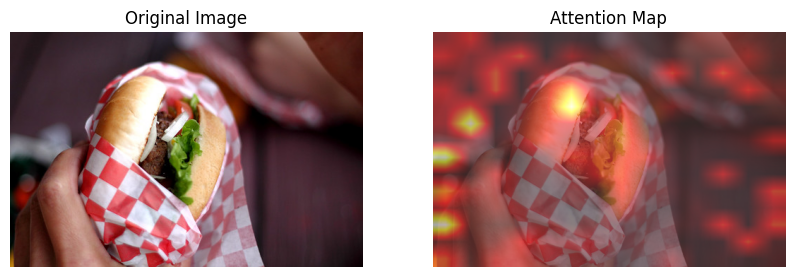

Image: /content/imagenet_a/imagenet-a/n01770393/0.058089_agama _ agama_0.9285006.jpg


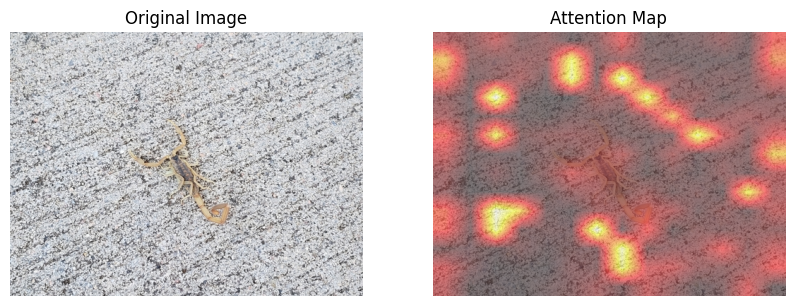

Image: /content/imagenet_a/imagenet-a/n01770393/0.016270_washing machine _ washing machine_0.5474708.jpg


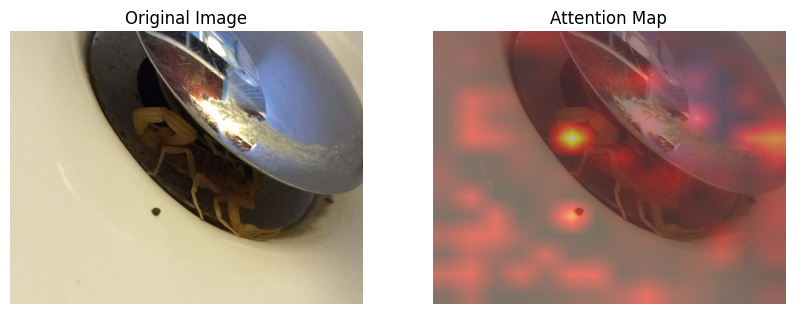


Visualizing attention maps for incorrectly classified samples...
Image: /content/imagenet_a/imagenet-a/n01882714/0.010133_cottontail rabbit _ porcupine_0.47029403.jpg


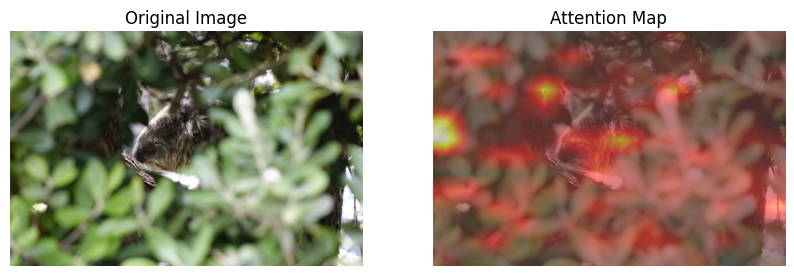

Image: /content/imagenet_a/imagenet-a/n01882714/0.011279_skunk _ skunk_0.6453746.jpg


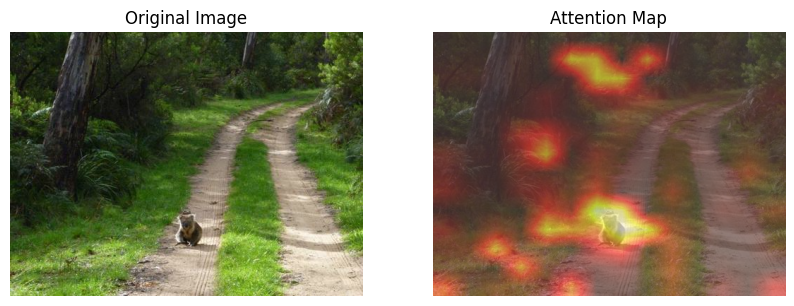

Image: /content/imagenet_a/imagenet-a/n01882714/0.009323_vulture _ vulture_0.8076583.jpg


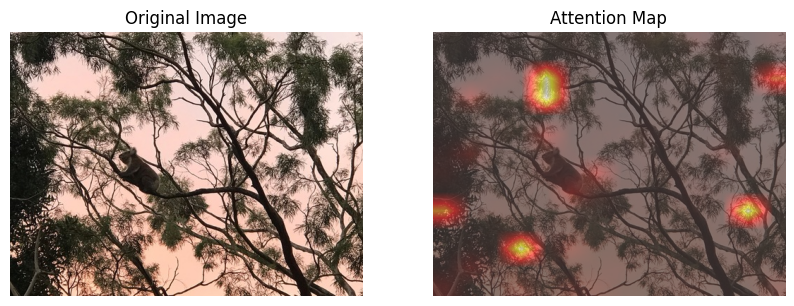

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch

# Load the pre-trained ViT model and feature extractor
model_name = "google/vit-base-patch16-224"
model = ViTForImageClassification.from_pretrained(model_name, output_attentions=True)  # Enable attention outputs
feature_extractor = ViTImageProcessor.from_pretrained(model_name)

# Function to visualize attention maps
def visualize_attention_maps(image_path, model, feature_extractor, layer_idx=-1, head_idx=0):

    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    inputs = feature_extractor(images=image, return_tensors="pt")

    # Run inference and extract attention weights
    with torch.no_grad():
        outputs = model(**inputs, output_attentions=True)
        attentions = outputs.attentions  # List of attention tensors for all layers

    # Get the attention weights for the specified layer and head
    attention_weights = attentions[layer_idx][0, head_idx].cpu().numpy()  # Shape: (num_patches + 1, num_patches + 1)

    # Remove the class token (first row and column)
    attention_weights = attention_weights[1:, 1:]  # Shape: (num_patches, num_patches)

    # Resize the attention weights to match the image size
    num_patches = attention_weights.shape[0]
    patch_size = int(np.sqrt(num_patches))
    attention_map = attention_weights.mean(axis=0).reshape(patch_size, patch_size)

    # Resize the attention map to match the original image size
    attention_map_resized = np.array(Image.fromarray(attention_map).resize(image.size, Image.BILINEAR))

    # Normalize the attention map for visualization
    attention_map_resized = (attention_map_resized - attention_map_resized.min()) / (
        attention_map_resized.max() - attention_map_resized.min()
    )

    # Plot the original image and the attention map
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(image, alpha=0.7)
    plt.imshow(attention_map_resized, cmap="hot", alpha=0.5)
    plt.title("Attention Map")
    plt.axis("off")

    plt.show()

# Visualize attention maps for the selected samples
print("Visualizing attention maps for correctly classified samples...")
for image_path in correct_samples:
    print(f"Image: {image_path}")
    visualize_attention_maps(image_path, model, feature_extractor)

print("\nVisualizing attention maps for incorrectly classified samples...")
for image_path in incorrect_samples:
    print(f"Image: {image_path}")
    visualize_attention_maps(image_path, model, feature_extractor)

## Task 3: Apply LRP and Visualize Relevance Maps



1. Load ViT model, apply LRP(Gamma rule) is applied to Linear layers.

2. Generate relevance maps via backward pass.




In [91]:
!pip install transformers==4.46.2 torch==2.1.0
!git clone https://github.com/rachtibat/LRP-eXplains-Transformers
!pip install ./LRP-eXplains-Transformers
!pip install lxt
!pip install zennit #to implement LRP with specialized gamma rules

In [10]:
!pip show lxt

Name: lxt
Version: 0.6.1
Summary: LRP explains Transformers
Home-page: https://github.com/rachtibat/LRP-for-Transformers
Author: Reduan Achtibat
Author-email: 
License: BSD 3-clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: accelerate, bitsandbytes, matplotlib, open-clip-torch, tabulate, torch, transformers
Required-by: 


Visualizing relevance maps for correctly classified samples...
Processing: /content/imagenet_a/imagenet-a/n07697313/0.006780_hot dog _ hot dog_0.99364483.jpg


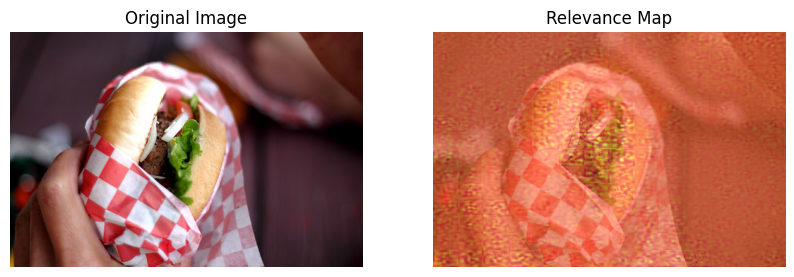

Processing: /content/imagenet_a/imagenet-a/n01770393/0.058089_agama _ agama_0.9285006.jpg


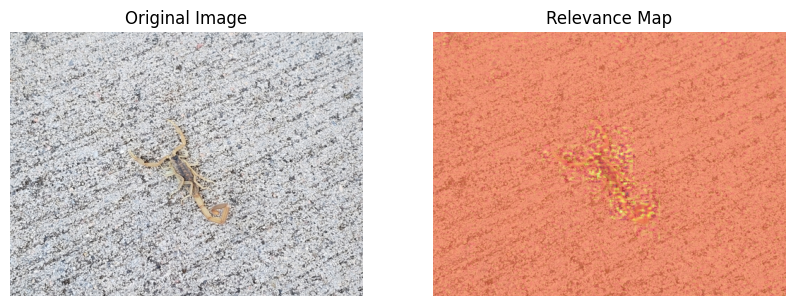

Processing: /content/imagenet_a/imagenet-a/n01770393/0.016270_washing machine _ washing machine_0.5474708.jpg


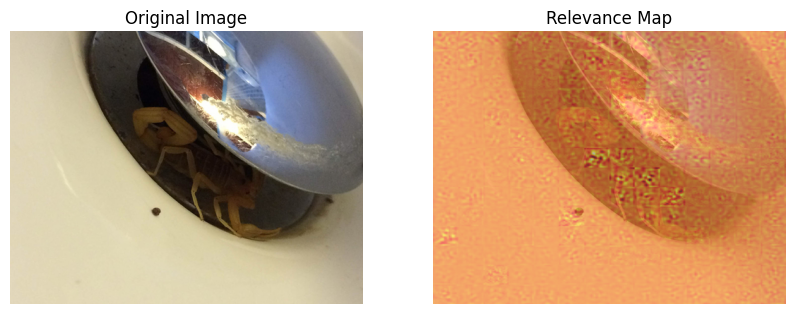


Visualizing relevance maps for incorrectly classified samples...
Processing: /content/imagenet_a/imagenet-a/n01882714/0.010133_cottontail rabbit _ porcupine_0.47029403.jpg


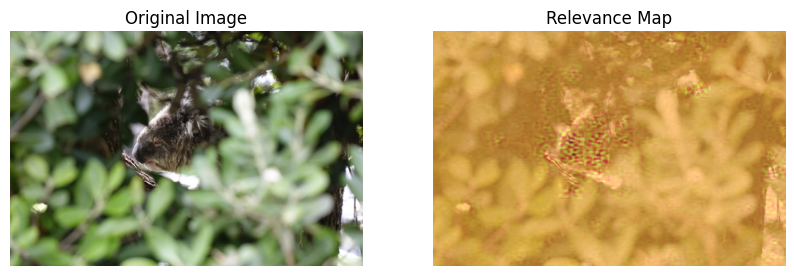

Processing: /content/imagenet_a/imagenet-a/n01882714/0.011279_skunk _ skunk_0.6453746.jpg


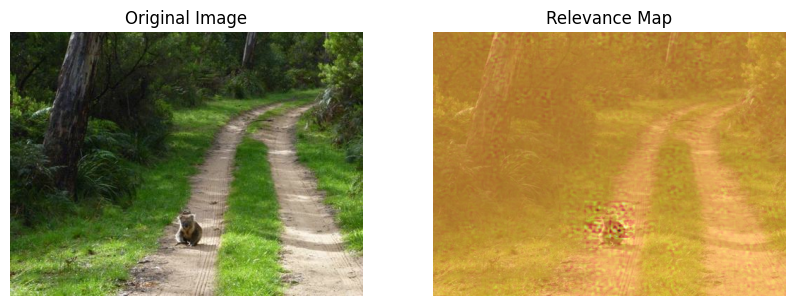

Processing: /content/imagenet_a/imagenet-a/n01882714/0.009323_vulture _ vulture_0.8076583.jpg


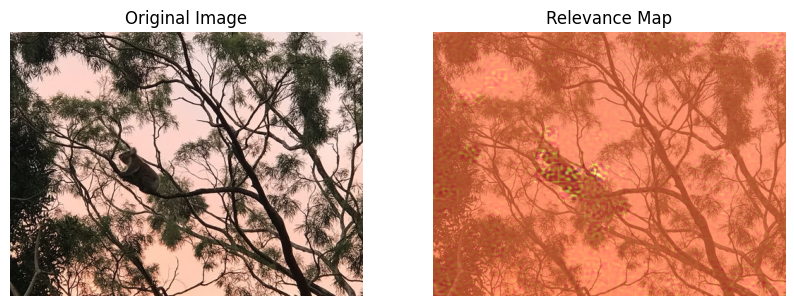

In [57]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from transformers import ViTForImageClassification, ViTImageProcessor

# LXT & Zennit Imports
from lxt.core import Composite
from zennit.composites import LayerMapComposite
import zennit.rules as z_rules

# Load the pre-trained ViT model and feature extractor
model_name = "google/vit-base-patch16-224"
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTImageProcessor.from_pretrained(model_name)

# Use Zennit rules for better heatmaps
zennit_comp = LayerMapComposite([
    (torch.nn.Linear, z_rules.Gamma(0.1)),  # Gamma rule for Linear layers
])

# Register rules with LXT
zennit_comp.register(model)

import os

for path in correct_samples + incorrect_samples:
    if not os.path.exists(path):
        print(f"Warning: Image file not found - {path}")


# Function to visualize relevance maps
def visualize_relevance_map(image_path, model, feature_extractor):
    """
    Visualize the relevance map for a given image.
    :param image_path: Path to the image.
    :param model: Pre-trained ViT model wrapped with LRP.
    :param feature_extractor: ViT feature extractor.
    """
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    inputs = feature_extractor(images=image, return_tensors="pt")

    # Enable gradient computation for the input tensor
    inputs["pixel_values"].requires_grad_(True)

    # Forward pass
    outputs = model(**inputs)
    predicted_class_idx = outputs.logits.argmax(-1).item()

    # Compute gradients using LRP
    model.zero_grad()
    outputs.logits[0, predicted_class_idx].backward()
    relevance_scores = inputs["pixel_values"].grad  # Get relevance scores from gradients

    # Normalize the relevance scores
    relevance_scores = relevance_scores.cpu().numpy().squeeze()  # Remove batch and channel dimensions
    relevance_scores = np.mean(relevance_scores, axis=0)  # Average across channels
    relevance_scores = (relevance_scores - relevance_scores.min()) / (relevance_scores.max() - relevance_scores.min())

    # Resize the relevance map to match the original image size
    relevance_map_resized = np.array(Image.fromarray((relevance_scores * 255).astype(np.uint8)).resize(image.size, Image.BILINEAR))

    # Plot the original image and the relevance map
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(image, alpha=0.7)
    plt.imshow(relevance_map_resized, cmap="hot", alpha=0.5)
    plt.title("Relevance Map")
    plt.axis("off")

    plt.show()

print("Visualizing relevance maps for correctly classified samples...")
for image_path in correct_samples:
    print(f"Processing: {image_path}")
    visualize_relevance_map(image_path, model, feature_extractor)

print("\nVisualizing relevance maps for incorrectly classified samples...")
for image_path in incorrect_samples:
    print(f"Processing: {image_path}")
    visualize_relevance_map(image_path, model, feature_extractor)


# Clean up: Remove Zennit Composite after use
zennit_comp.remove()
